The data is available as two attached CSV files: takehome_user_engagement.csv takehome_users.csv

The data has the following two tables: 1] A user table ( "takehome_users" ) with data on 12,000 users who signed up for the product in the last two years. 2] A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product.

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period, identify which factors predict future user adoption.

We suggest spending 1-2 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings ( the more concise, the better -- no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df_user = pd.read_csv('takehome_users.csv')
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df_ta_en = pd.read_csv('takehome_user_engagement.csv')
df_ta_en.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
df_user.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [7]:
df_ta_en['time_stamp'] = pd.to_datetime(df_ta_en['time_stamp'])
df_ta_en['time_stamp']

0        2014-04-22 03:53:30
1        2013-11-15 03:45:04
2        2013-11-29 03:45:04
3        2013-12-09 03:45:04
4        2013-12-25 03:45:04
                 ...        
207912   2013-09-06 06:14:15
207913   2013-01-15 18:28:37
207914   2014-04-27 12:45:16
207915   2012-06-02 11:55:59
207916   2014-01-26 08:57:12
Name: time_stamp, Length: 207917, dtype: datetime64[ns]

In [24]:
data = df_ta_en.set_index('time_stamp').groupby('user_id')['visited'].resample('D').count()

In [25]:
data=pd.DataFrame(data)

In [26]:
data

visited
user_id time_stamp         
1       2014-04-22        1
2       2013-11-15        1
        2013-11-16        0
        2013-11-17        0
        2013-11-18        0
...                     ...
11996   2013-09-06        1
11997   2013-01-15        1
11998   2014-04-27        1
11999   2012-06-02        1
12000   2014-01-26        1

[522501 rows x 1 columns]

In [30]:
data['visited_7_days'] = data.rolling(window=7, min_periods=1).sum()

In [31]:
data

visited  visited_7_days
user_id time_stamp                         
1       2014-04-22        1             1.0
2       2013-11-15        1             2.0
        2013-11-16        0             2.0
        2013-11-17        0             2.0
        2013-11-18        0             2.0
...                     ...             ...
11996   2013-09-06        1             4.0
11997   2013-01-15        1             5.0
11998   2014-04-27        1             6.0
11999   2012-06-02        1             7.0
12000   2014-01-26        1             7.0

[522501 rows x 2 columns]

In [33]:
user_adopted = data.groupby('user_id')['visited_7_days'].max().reset_index()
user_adopted.head() 

,user_id,visited_7_days
0,1,1.0
1,2,3.0
2,3,2.0
3,4,3.0
4,5,4.0


In [34]:
user_adopted['adopted_user'] = user_adopted['visited_7_days'].apply(lambda x: 1 if x >= 3 else 0)
user_adopted['adopted_user'] 

0       0
1       1
2       0
3       1
4       1
       ..
8818    1
8819    1
8820    1
8821    1
8822    1
Name: adopted_user, Length: 8823, dtype: int64

In [37]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [44]:
df = df_user.join(user_adopted, on = 'object_id', how = 'left')

In [45]:
df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,visited_7_days,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2.0,3.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,2.0,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,4.0,3.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,5.0,4.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,6.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,NaN,NaN,NaN
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,NaN,NaN,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,NaN,NaN,NaN
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,NaN,NaN,NaN


In [46]:
df['last_session_creation_time'].fillna(0, inplace = True)
df['adopted_user'].fillna(0, inplace = True)   

In [50]:
df

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,visited_7_days,adopted_user
0,GUEST_INVITE,1,0,11,10803.0,2.0,3.0,1.0
1,ORG_INVITE,0,0,1,316.0,3.0,2.0,0.0
2,ORG_INVITE,0,0,94,1525.0,4.0,3.0,1.0
3,GUEST_INVITE,0,0,1,5151.0,5.0,4.0,1.0
4,GUEST_INVITE,0,0,193,5240.0,6.0,5.0,1.0
...,...,...,...,...,...,...,...,...
11995,ORG_INVITE,0,0,89,8263.0,NaN,NaN,0.0
11996,SIGNUP_GOOGLE_AUTH,0,0,200,NaN,NaN,NaN,0.0
11997,GUEST_INVITE,1,1,83,8074.0,NaN,NaN,0.0
11998,PERSONAL_PROJECTS,0,0,6,NaN,NaN,NaN,0.0


In [59]:
df_new = df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 
              'org_id', 'invited_by_user_id', 'adopted_user' ]]
     

In [62]:
ddf = df_new.corr().round(2)
ddf

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
opted_in_to_mailing_list,1.00,0.48,0.00,0.00,0.01
enabled_for_marketing_drip,0.48,1.00,0.01,0.00,0.01
org_id,0.00,0.01,1.00,-0.06,0.00
invited_by_user_id,0.00,0.00,-0.06,1.00,-0.00
adopted_user,0.01,0.01,0.00,-0.00,1.00


<function matplotlib.pyplot.show(close=None, block=None)>

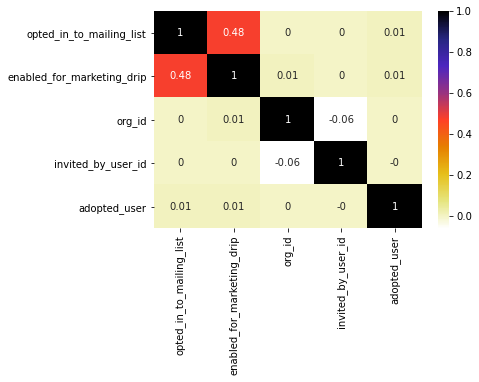

In [64]:
sns.heatmap(ddf,annot=True,cmap="CMRmap_r")
plt.xticks(rotation='90')
plt.show